## Mustafa Habibi

## Sprint 8. Unsupervised learning algorithms: Clustering

## Exercise 1
Download the attached dataset, of records of Facebook posts about Thailand, and rank the different records using the K-means algorithm.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from kneed import KneeLocator

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# load dataset
df = pd.read_csv('Publicacions Facebook Thailandia.csv')

In [2]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
df.shape

(7050, 16)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [5]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [6]:
df.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [7]:
df['status_id'].duplicated().sum()

53

In [8]:
# Remove duplicate rows and update the DataFrame

df.drop_duplicates(subset='status_id', inplace=True)

In [53]:
df.isnull().sum().any()

False

In [52]:
df.isna().sum().any()

False

Description of the columns:

1. status_id: Unique identifier for each status update.

2. status_type: The type of status update, indicating whether it is a "photo" or a "video".

3. status_published: The date and time when the status update was published.

4. num_reactions: The number of reactions received for the status update.

5. num_comments: The number of comments received for the status update.

6. num_shares: The number of shares received for the status update.

7. num_likes: The number of "likes" received for the status update.

8. num_loves: The number of "loves" received for the status update.

9. num_wows: The number of "wows" received for the status update.

10. num_hahas: The number of "hahas" received for the status update.

11. num_sads: The number of "sads" received for the status update.

12. num_angrys: The number of "angrys" received for the status update.

13. Column1, Column2, Column3, Column4: Additional columns with unknown contents, potentially containing additional information or data related to the status updates.


## Preprocessing

In [11]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Split 'status_published' into 'date_published' and 'time_published' columns
df[['date_published', 'time_published']] = df['status_published'].str.split(' ', expand=True)

# Convert the 'date_published' column to datetime format
df['date_published'] = pd.to_datetime(df['date_published'])

# Convert the 'time_published' column to time format (without date)
df['time_published'] = pd.to_datetime(df['time_published'], format='%H:%M').dt.time


In [12]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4,date_published,time_published
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN,2018-04-22,06:00:00
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN,2018-04-21,22:45:00
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN,2018-04-21,06:17:00
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN,2018-04-21,02:29:00
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN,2018-04-18,03:22:00


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6997 entries, 0 to 7049
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_id         6997 non-null   object        
 1   status_type       6997 non-null   object        
 2   status_published  6997 non-null   object        
 3   num_reactions     6997 non-null   int64         
 4   num_comments      6997 non-null   int64         
 5   num_shares        6997 non-null   int64         
 6   num_likes         6997 non-null   int64         
 7   num_loves         6997 non-null   int64         
 8   num_wows          6997 non-null   int64         
 9   num_hahas         6997 non-null   int64         
 10  num_sads          6997 non-null   int64         
 11  num_angrys        6997 non-null   int64         
 12  Column1           0 non-null      float64       
 13  Column2           0 non-null      float64       
 14  Column3           0 non-null 

In [14]:
# drop columns without and unnessesary data
df = df.drop(columns = ['status_id','Column1', 'Column2', 'Column3', 'Column4', 'status_published'], axis= 1)

In [15]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,date_published,time_published
0,video,529,512,262,432,92,3,1,1,0,2018-04-22,06:00:00
1,photo,150,0,0,150,0,0,0,0,0,2018-04-21,22:45:00
2,video,227,236,57,204,21,1,1,0,0,2018-04-21,06:17:00
3,photo,111,0,0,111,0,0,0,0,0,2018-04-21,02:29:00
4,photo,213,0,0,204,9,0,0,0,0,2018-04-18,03:22:00


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6997 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   status_type     6997 non-null   object        
 1   num_reactions   6997 non-null   int64         
 2   num_comments    6997 non-null   int64         
 3   num_shares      6997 non-null   int64         
 4   num_likes       6997 non-null   int64         
 5   num_loves       6997 non-null   int64         
 6   num_wows        6997 non-null   int64         
 7   num_hahas       6997 non-null   int64         
 8   num_sads        6997 non-null   int64         
 9   num_angrys      6997 non-null   int64         
 10  date_published  6997 non-null   datetime64[ns]
 11  time_published  6997 non-null   object        
dtypes: datetime64[ns](1), int64(9), object(2)
memory usage: 710.6+ KB


In [17]:
from scipy import stats
print('Null hypothesis H0, the sample has a normal distribution, It is Guessian')
print('Alternative hypothesis H1, the sample does not  have a normal distribution, It is not Guessian')


columns= df[['num_reactions', 'num_comments', 'num_shares', 'num_likes',
       'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]

for i in columns:
    shapiro_test = stats.shapiro(df[i])
    print('For the variable ', i, 'with a p-value of ', shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('We cannot reject the null hypothesis, It is Guessian')
    else:
        print('We can reject the null hypothesis, It is not Guessian')

Null hypothesis H0, the sample has a normal distribution, It is Guessian
Alternative hypothesis H1, the sample does not  have a normal distribution, It is not Guessian
For the variable  num_reactions with a p-value of  0.0
We can reject the null hypothesis, It is not Guessian
For the variable  num_comments with a p-value of  0.0
We can reject the null hypothesis, It is not Guessian
For the variable  num_shares with a p-value of  0.0
We can reject the null hypothesis, It is not Guessian
For the variable  num_likes with a p-value of  0.0
We can reject the null hypothesis, It is not Guessian
For the variable  num_loves with a p-value of  0.0
We can reject the null hypothesis, It is not Guessian
For the variable  num_wows with a p-value of  0.0
We can reject the null hypothesis, It is not Guessian
For the variable  num_hahas with a p-value of  0.0
We can reject the null hypothesis, It is not Guessian
For the variable  num_sads with a p-value of  0.0
We can reject the null hypothesis, It is

In [18]:
# I want to find out all variables with outliers:
def find_outliers_IQR(df):
   q1 = df.quantile(0.25)
   q3 = df.quantile(0.75)
   IQR = q3 - q1
   outliers = df[((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR)))]
   return outliers


outliers = find_outliers_IQR(columns)

print("number of outliers: " + str(len(outliers)))
print("max outlier value: " + str(outliers.max()))
print("min outlier value: " + str(outliers.min()))

number of outliers: 6997
max outlier value: num_reactions     4710.0
num_comments     20990.0
num_shares        3424.0
num_likes         4710.0
num_loves          657.0
num_wows           278.0
num_hahas          157.0
num_sads            51.0
num_angrys          31.0
dtype: float64
min outlier value: num_reactions    515.0
num_comments      56.0
num_shares        11.0
num_likes        431.0
num_loves          8.0
num_wows           1.0
num_hahas          1.0
num_sads           1.0
num_angrys         1.0
dtype: float64


In [19]:
# Columns with outliers:
outlier_columns = outliers.columns[outliers.any()]
print("Columns with outliers:", ', '.join(outlier_columns))

Columns with outliers: num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, num_angrys


In [20]:
# Columns without outliers:
non_outlier_columns = outliers.columns[~outliers.any()]
print("Columns without outliers:", ', '.join(non_outlier_columns))

Columns without outliers: 


In [21]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the 'status_type' column
df['encoded_status_type'] = le.fit_transform(df['status_type'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical features
numerical_columns = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the first few rows of the preprocessed DataFrame
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,date_published,time_published,encoded_status_type
0,video,0.671339,0.320773,1.679078,0.505273,1.975729,0.200174,0.076009,0.518043,-0.160014,2018-04-22,06:00:00,3
1,photo,-0.165494,-0.252704,-0.304949,-0.136271,-0.318012,-0.143620,-0.175806,-0.157082,-0.160014,2018-04-21,22:45:00,1
2,video,0.004522,0.011633,0.126690,-0.013422,0.205560,-0.029022,0.076009,-0.157082,-0.160014,2018-04-21,06:17:00,3
3,photo,-0.251606,-0.252704,-0.304949,-0.224995,-0.318012,-0.143620,-0.175806,-0.157082,-0.160014,2018-04-21,02:29:00,1
4,photo,-0.026390,-0.252704,-0.304949,-0.013422,-0.093624,-0.143620,-0.175806,-0.157082,-0.160014,2018-04-18,03:22:00,1


In [22]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

trans = preprocessing.RobustScaler()
df[['num_reactions', 'num_comments', 'num_shares', 'num_likes',
       'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']] = trans.fit_transform(df[['num_reactions', 'num_comments', 'num_shares', 'num_likes',
       'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']])
df.head(20)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,date_published,time_published,encoded_status_type
0,video,2.366834,23.090909,65.50,2.272727,30.666667,0.343794,0.251814,0.675126,0.000000,2018-04-22,06:00:00,3
1,photo,0.462312,-0.181818,0.00,0.563636,0.000000,0.000000,0.000000,0.000000,0.000000,2018-04-21,22:45:00,1
2,video,0.849246,10.545455,14.25,0.890909,7.000000,0.114598,0.251814,0.000000,0.000000,2018-04-21,06:17:00,3
3,photo,0.266332,-0.181818,0.00,0.327273,0.000000,0.000000,0.000000,0.000000,0.000000,2018-04-21,02:29:00,1
4,photo,0.778894,-0.181818,0.00,0.890909,3.000000,0.000000,0.000000,0.000000,0.000000,2018-04-18,03:22:00,1
5,photo,0.798995,0.090909,0.00,0.933333,1.666667,0.114598,0.000000,0.000000,0.000000,2018-04-18,02:14:00,1
6,video,2.236181,27.727273,18.00,2.187879,23.333333,1.145981,0.503629,0.000000,4.356484,2018-04-18,00:24:00,3
7,video,1.190955,20.409091,13.25,1.230303,10.666667,0.114598,0.251814,0.000000,1.452161,2018-04-17,07:42:00,3
8,photo,0.728643,-0.136364,0.00,0.854545,1.666667,0.000000,0.000000,0.000000,0.000000,2018-04-17,03:33:00,1
9,photo,0.562814,0.227273,0.25,0.666667,1.000000,0.000000,0.000000,0.000000,0.000000,2018-04-11,04:53:00,1


In [23]:
# List of columns you want to convert to int
columns_to_convert = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
                      'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

# Convert the selected columns from float to int
df[columns_to_convert] = df[columns_to_convert].astype(int)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6997 entries, 0 to 7049
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   status_type          6997 non-null   object        
 1   num_reactions        6997 non-null   int32         
 2   num_comments         6997 non-null   int32         
 3   num_shares           6997 non-null   int32         
 4   num_likes            6997 non-null   int32         
 5   num_loves            6997 non-null   int32         
 6   num_wows             6997 non-null   int32         
 7   num_hahas            6997 non-null   int32         
 8   num_sads             6997 non-null   int32         
 9   num_angrys           6997 non-null   int32         
 10  date_published       6997 non-null   datetime64[ns]
 11  time_published       6997 non-null   object        
 12  encoded_status_type  6997 non-null   int32         
dtypes: datetime64[ns](1), int32(10), objec

### Visualization

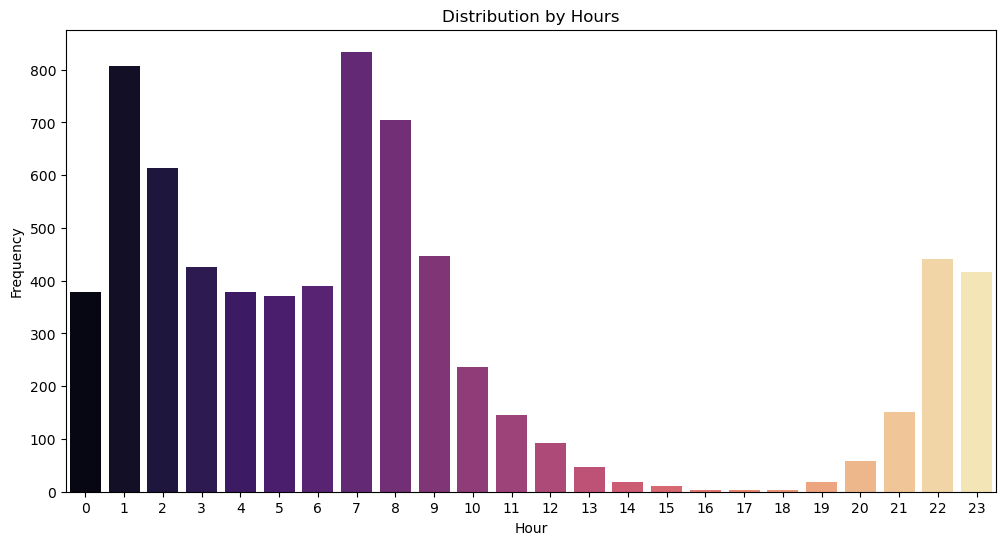

In [25]:
# Get the frequencies
hour_counts = df.groupby(df['time_published'].apply(lambda x: x.hour)).size()

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=hour_counts.index, y=hour_counts.values, palette='magma')  # Change 'magma' to the desired color palette

# Configure the labels
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Distribution by Hours')

# Show the plot
plt.show()


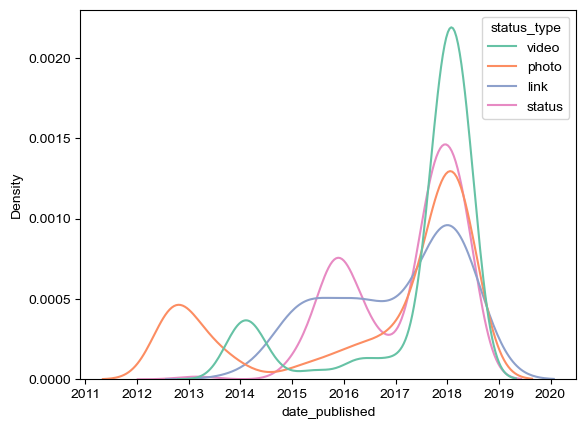

In [26]:
# We can also visualize the progression of status types over the years

# Plot the KDE plot with the 'date_published' on the x-axis, hue='status_type', and using 'Set2' color palette
sns.kdeplot(x='date_published', hue='status_type', data=df, common_norm=False, palette="Set2")

# Set the figure size
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Display the plot
plt.show()


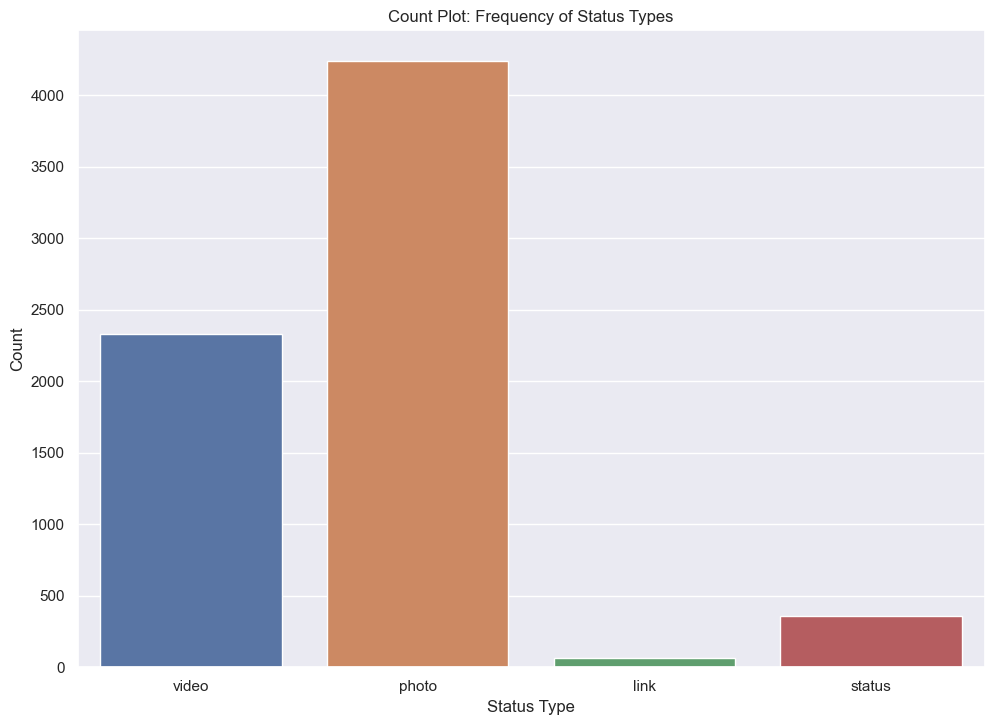

In [27]:
sns.countplot(x='status_type', data=df)
plt.xlabel('Status Type')
plt.ylabel('Count')
plt.title('Count Plot: Frequency of Status Types')
plt.show()

In [28]:
# Perform dummy encoding on the 'status_type' column
df= pd.get_dummies(df, columns=['status_type']) #drop_first=True)

# Convert boolean columns to 0 and 1
df['status_type_photo'] = df['status_type_photo'].astype(float)
df['status_type_status'] = df['status_type_status'].astype(float)
df['status_type_video'] = df['status_type_video'].astype(float)
df['status_type_link'] = df['status_type_link'].astype(float)


df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,date_published,time_published,encoded_status_type,status_type_link,status_type_photo,status_type_status,status_type_video
0,2,23,65,2,30,0,0,0,0,2018-04-22,06:00:00,3,0.0,0.0,0.0,1.0
1,0,0,0,0,0,0,0,0,0,2018-04-21,22:45:00,1,0.0,1.0,0.0,0.0
2,0,10,14,0,6,0,0,0,0,2018-04-21,06:17:00,3,0.0,0.0,0.0,1.0
3,0,0,0,0,0,0,0,0,0,2018-04-21,02:29:00,1,0.0,1.0,0.0,0.0
4,0,0,0,0,2,0,0,0,0,2018-04-18,03:22:00,1,0.0,1.0,0.0,0.0


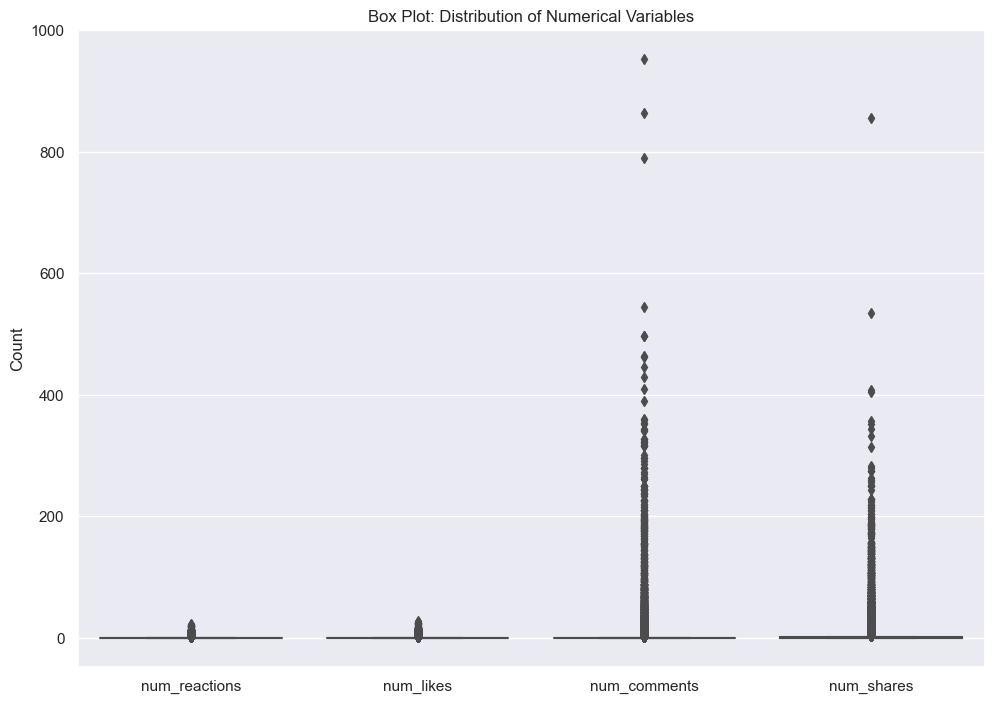

In [29]:
sns.boxplot(data=df[['num_reactions', 'num_likes', 'num_comments', 'num_shares']])
plt.ylabel('Count')
plt.title('Box Plot: Distribution of Numerical Variables')
plt.show()


## PCA

Text(0, 0.5, 'Cumulative variance explained')

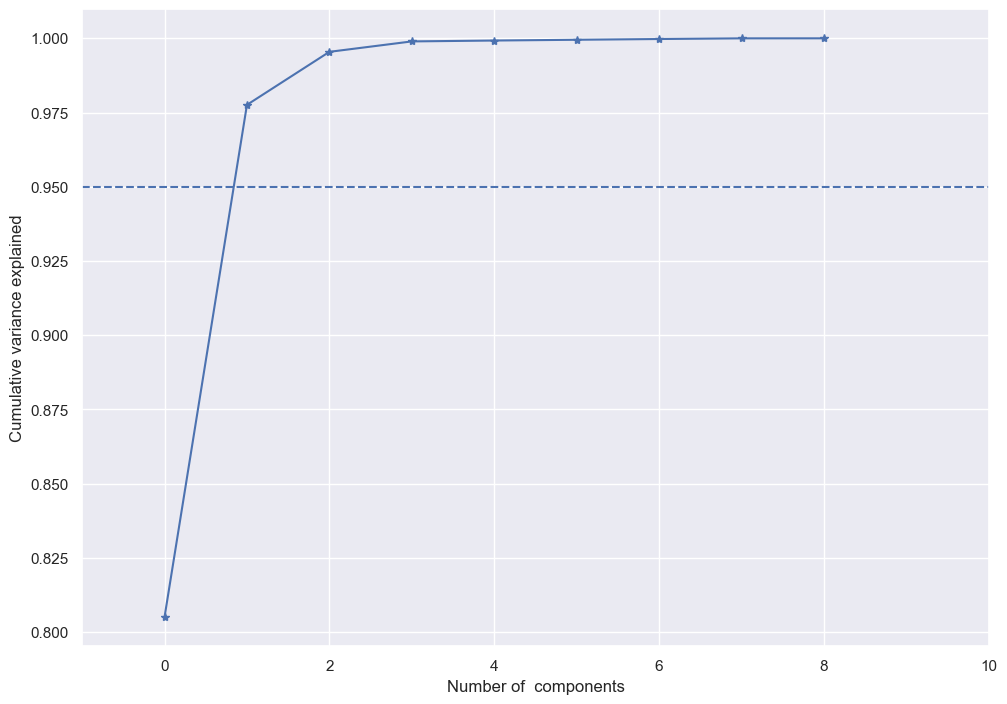

In [30]:
df_dummies= df[['status_type_link', 'status_type_photo', 'status_type_status', 'status_type_video']]
df_num= df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]
pca = PCA().fit(df_num)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = "*")
plt.axhline(0.95, linestyle = '--')
plt.xlim([-1,10])
plt.xlabel('Number of  components')
plt.ylabel('Cumulative variance explained')

We observe that this linear combination is found between dimensions 1 and 2. Therefore, let's analyze to which number of dimensions we should reduce our data while retaining 95% of their variance.

In [31]:
pca = PCA()
pca.fit(df_num)  # df_numeric should contain only numeric features
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
num_components = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components for 95% variance: {num_components}")


Number of components for 95% variance: 2


In [32]:
from sklearn.decomposition import PCA

n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(df_num)

# Create a new DataFrame with the PCA components
pca_columns = [f'PCA_{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(data=X_pca, columns=pca_columns)


# Display the DataFrame with PCA components
df_pca.head()


,PCA_1,PCA_2
0,47.688052,39.715789
1,-14.403002,-2.244724
2,2.840116,3.535095
3,-14.403002,-2.244724
4,-14.009503,-1.688421


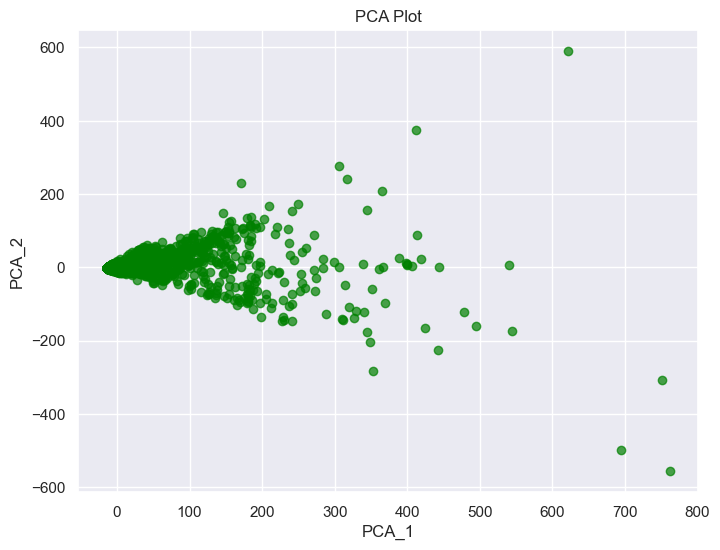

In [33]:
import matplotlib.pyplot as plt

# Assuming 'pca_df' is your DataFrame with the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PCA_1'], df_pca['PCA_2'], alpha=0.7, color= 'green')

# Add labels and title
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title('PCA Plot')

# Show the plot
plt.show()




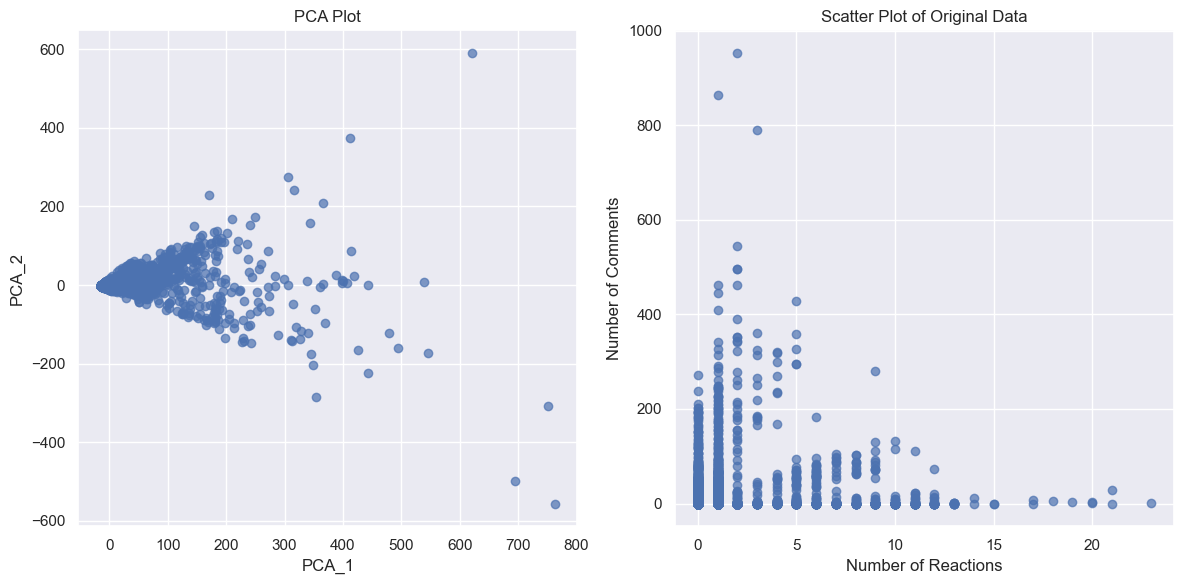

In [34]:
plt.figure(figsize=(12, 6))

# Subplot 1 - PCA Plot
plt.subplot(1, 2, 1)
plt.scatter(df_pca['PCA_1'], df_pca['PCA_2'], alpha=0.7)
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title('PCA Plot')

# Subplot 2 - Scatter plot of original data
plt.subplot(1, 2, 2)
plt.scatter(df['num_reactions'], df['num_comments'], alpha=0.7)
plt.xlabel('Number of Reactions')
plt.ylabel('Number of Comments')
plt.title('Scatter Plot of Original Data')

# Adjust layout and spacing
plt.tight_layout()

# Show the plots
plt.show()


## K-means

In [35]:
df.columns

Index(['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'date_published',
       'time_published', 'encoded_status_type', 'status_type_link',
       'status_type_photo', 'status_type_status', 'status_type_video'],
      dtype='object')

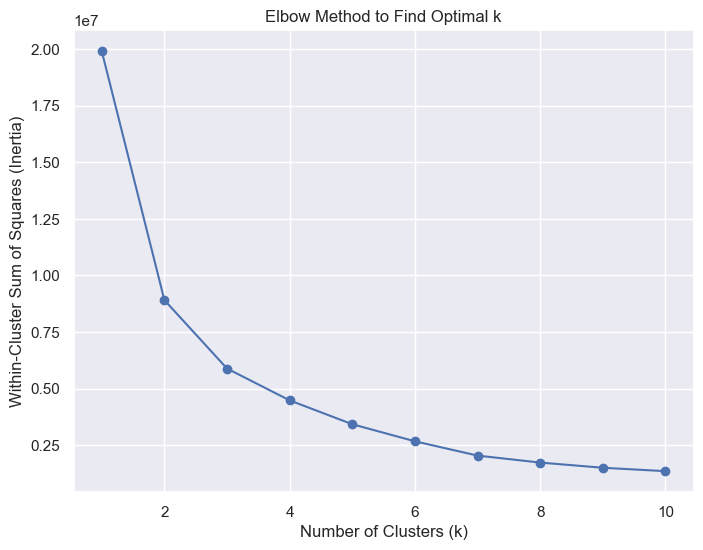

In [36]:
from sklearn.cluster import KMeans

# Create a list to store the inertia values for different values of k
inertia = []

# Define the range of k values to try
k_values = range(1, 11)

# Fit KMeans models for each value of k and compute inertia
for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(df_pca[['PCA_1', 'PCA_2']])
    inertia.append(kmeans_model.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method to Find Optimal k')
plt.show()

In [37]:
kl = KneeLocator(k_values, inertia, curve="convex", direction="decreasing")
kl.elbow

3

Accourding the Elbo methon above, the aproperiate cluster number is 3.

In [38]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(df_pca)

#predigo
predicts = km.predict(df_pca)
predicts

array([2, 0, 0, ..., 0, 0, 0])

In [39]:
df= (df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys','encoded_status_type', 'status_type_link',
       'status_type_photo', 'status_type_status', 'status_type_video']])
df.cluster = df.copy()

df.cluster['Cluster K-means'] = predicts
df.cluster.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,encoded_status_type,status_type_link,status_type_photo,status_type_status,status_type_video,Cluster K-means
0,2,23,65,2,30,0,0,0,0,3,0.0,0.0,0.0,1.0,2
1,0,0,0,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0,0
2,0,10,14,0,6,0,0,0,0,3,0.0,0.0,0.0,1.0,0
3,0,0,0,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0,0
4,0,0,0,0,2,0,0,0,0,1,0.0,1.0,0.0,0.0,0


In [40]:
from sklearn.cluster import KMeans

num_clusters = 3
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the KMeans model to the data
kmeans_model.fit(df_pca)

# Add the cluster labels to your DataFrame
df['Cluster'] = kmeans_model.labels_

# Print the count of data points in each cluster
print(df['Cluster'].value_counts())



Cluster
0    6450
2     475
1      72
Name: count, dtype: int64


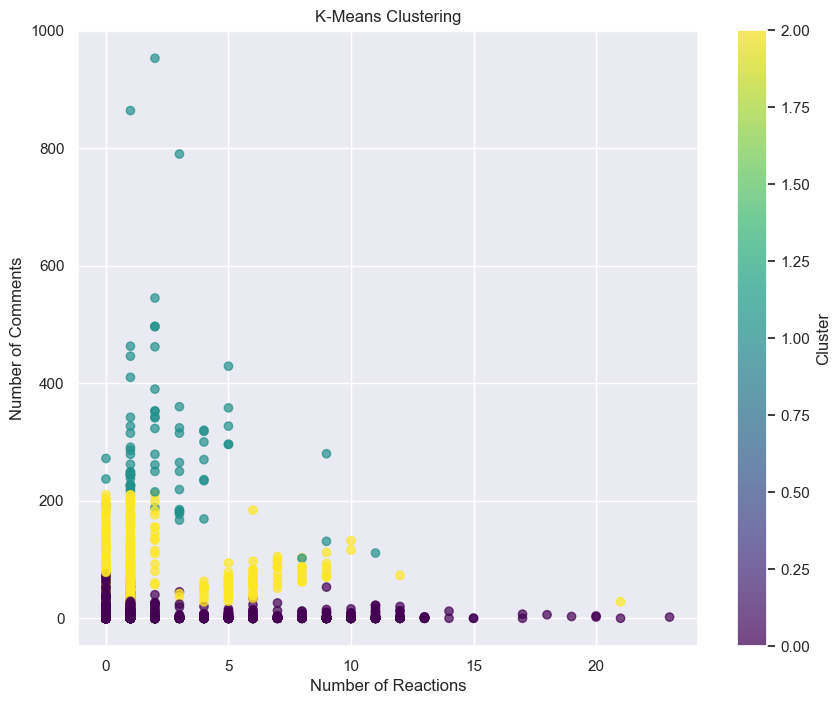

In [41]:
plt.figure(figsize=(10, 8))
plt.scatter(df['num_reactions'], df['num_comments'], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Number of Reactions')
plt.ylabel('Number of Comments')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()


In [42]:
# Group the data by cluster and sum the reactions
cluster_reactions = df.groupby('Cluster')[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']].sum()

# Print the counts
print(cluster_reactions)


         num_reactions  num_comments  num_shares  num_likes  num_loves  \
Cluster                                                                  
0                 4053         13235       16442       4982       8725   
1                  182         22073       12154        160       3295   
2                  786         34306       40337        662      16363   

         num_wows  num_hahas  num_sads  num_angrys  
Cluster                                             
0             108        248       450         405  
1              56        133       123         106  
2             374        430       215         385  




### **Cluster 0 Analysis**:
**Size**: Cluster 0 is the largest, with 6,450 data points, suggesting that it represents the majority of your dataset.

- **Likes**: Posts in Cluster 0 have a total of 4,053 likes, indicating that they resonate well with the audience in terms of likes.
- **Comments**: There are 13,235 comments in this cluster, suggesting that posts here generate a substantial amount of discussion and engagement.
- **Shares**: With 16,442 shares, it appears that content in Cluster 0 is shared frequently, indicating its reach and popularity.
- **Loves**: The presence of 8,725 love reactions indicates that posts in this cluster evoke strong positive emotions, particularly love.
- **Wows**: There are 108 wow reactions, suggesting that some posts in this cluster elicit astonishment or admiration.
- **Hahas**: With 248 haha reactions, it appears that humor or lighthearted content is also prevalent in Cluster 0.
- **Sads**: There are 450 sad reactions, which implies that some posts in this cluster elicit sympathy or sadness.
- **Angrys**: The presence of 405 angry reactions suggests that there's also a level of controversy or strong opinions associated with these posts.

Understanding the predominant reaction types within Cluster 0 can provide insights into what content performs best in terms of user engagement and emotional impact.

### **Cluster 1 Analysis**:
**Size**: Cluster 1 is smaller, containing 475 data points and exhibiting different characteristics from Cluster 0.

- **Likes**: Posts in Cluster 1 have a total of 182 likes, indicating that they receive relatively fewer likes compared to other clusters.
- **Comments**: There are 22,073 comments in this cluster, suggesting that posts here generate an exceptionally high level of discussion despite the low number of likes.
- **Shares**: With 12,154 shares, it appears that content in Cluster 1 is shared quite frequently, indicating its reach and popularity.
- **Loves**: The presence of 3,295 love reactions indicates that positive emotions play a significant role in this cluster.
- **Wows**: There are 56 wow reactions, implying that some posts in this cluster elicit astonishment or admiration.
- **Hahas**: With 133 haha reactions, it appears that humor or lighthearted content is also present.
- **Sads**: The 123 sad reactions indicate that some posts in this cluster elicit sympathy or sadness.
- **Angrys**: The presence of 106 angry reactions suggests that there's a certain level of controversy or strong opinions associated with these posts.

### **Cluster 2 Analysis**:
**Size**: Cluster 2 is the smallest, with only 72 data points, suggesting that it contains unique or outlier data.

- **Likes**: Posts in Cluster 2 have a total of 786 likes, indicating that they receive a moderate level of likes.
- **Comments**: There are 34,306 comments in this cluster, suggesting that posts here generate a significant amount of discussion and engagement.
- **Shares**: With 40,337 shares, content in Cluster 2 is frequently shared, indicating its reach and popularity.
- **Loves**: The presence of 16,363 love reactions indicates that positive emotions play a significant role in this cluster.
- **Wows**: There are 374 wow reactions, implying that some posts in this cluster elicit astonishment or admiration.
- **Hahas**: With 430 haha reactions, it appears that humor or lighthearted content is also present.
- **Sads**: The 215 sad reactions indicate that some posts in this cluster elicit sympathy or sadness.
- **Angrys**: The presence of 385 angry reactions suggests that there's also a level of controversy or strong opinions associated with these posts.

### **Overall Interpretation**:
The K-means clustering analysis reveals three distinct clusters, each with its unique characteristics. By examining the predominant features and reactions within each cluster, valuable insights into audience preferences and content performance can be gained. These insights can inform content strategies and marketing decisions to enhance user engagement and satisfaction.

These findings help you tailor your content and engagement strategies to each cluster's characteristics, optimizing your approach for different audience segments.

<Figure size 1000x600 with 0 Axes>

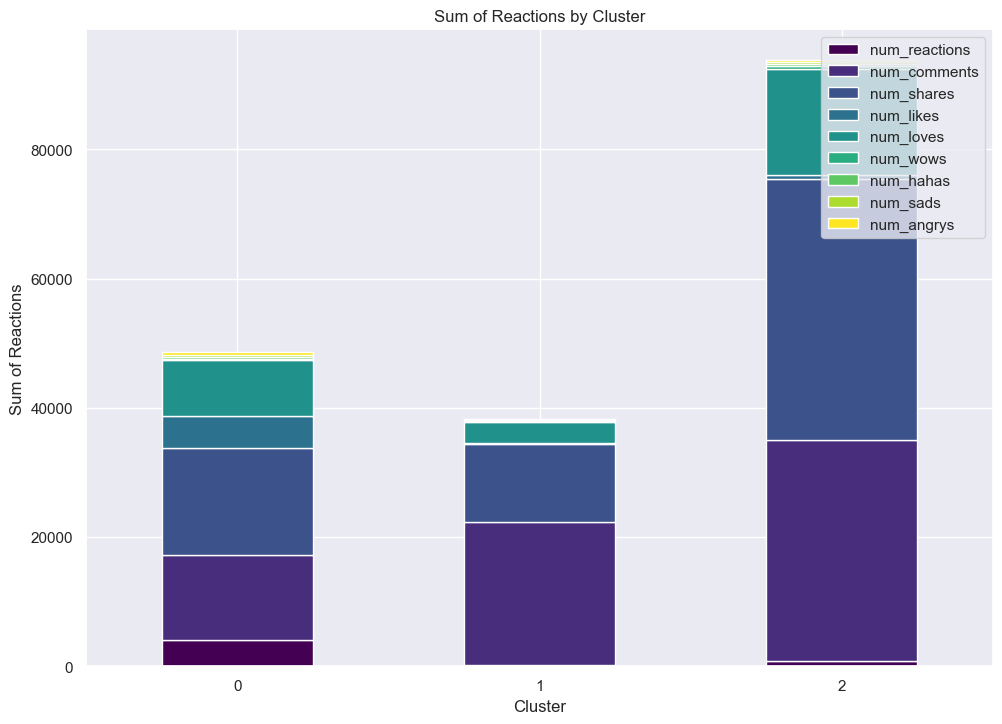

In [43]:
import matplotlib.pyplot as plt

# Assuming 'Cluster' is the column with cluster labels in your DataFrame
# Group the data by cluster and sum the reactions
cluster_reactions = df.groupby('Cluster')[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']].sum()

# Plot the sum of reactions for each cluster
plt.figure(figsize=(10, 6))
cluster_reactions.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Cluster')
plt.ylabel('Sum of Reactions')
plt.title('Sum of Reactions by Cluster')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()


In [44]:
df.columns

Index(['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys',
       'encoded_status_type', 'status_type_link', 'status_type_photo',
       'status_type_status', 'status_type_video', 'Cluster'],
      dtype='object')

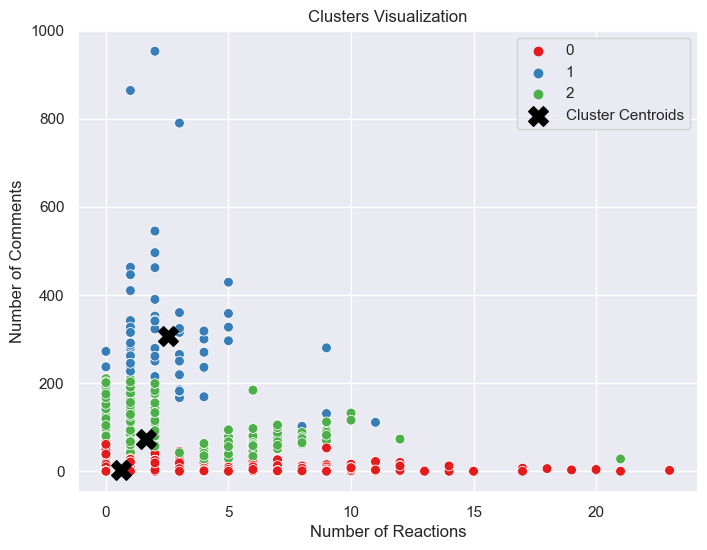

         num_reactions  num_comments  num_shares  num_likes  num_loves  \
Cluster                                                                  
0             0.628372      2.051938    2.549147   0.772403   1.352713   
1             2.527778    306.569444  168.805556   2.222222  45.763889   
2             1.654737     72.223158   84.920000   1.393684  34.448421   

         num_wows  num_hahas  num_sads  num_angrys  encoded_status_type  \
Cluster                                                                   
0        0.016744   0.038450  0.069767    0.062791             1.600620   
1        0.777778   1.847222  1.708333    1.472222             2.972222   
2        0.787368   0.905263  0.452632    0.810526             2.991579   

         status_type_link  status_type_photo  status_type_status  \
Cluster                                                            
0                0.009767           0.657209            0.055659   
1                0.000000           0.013889     

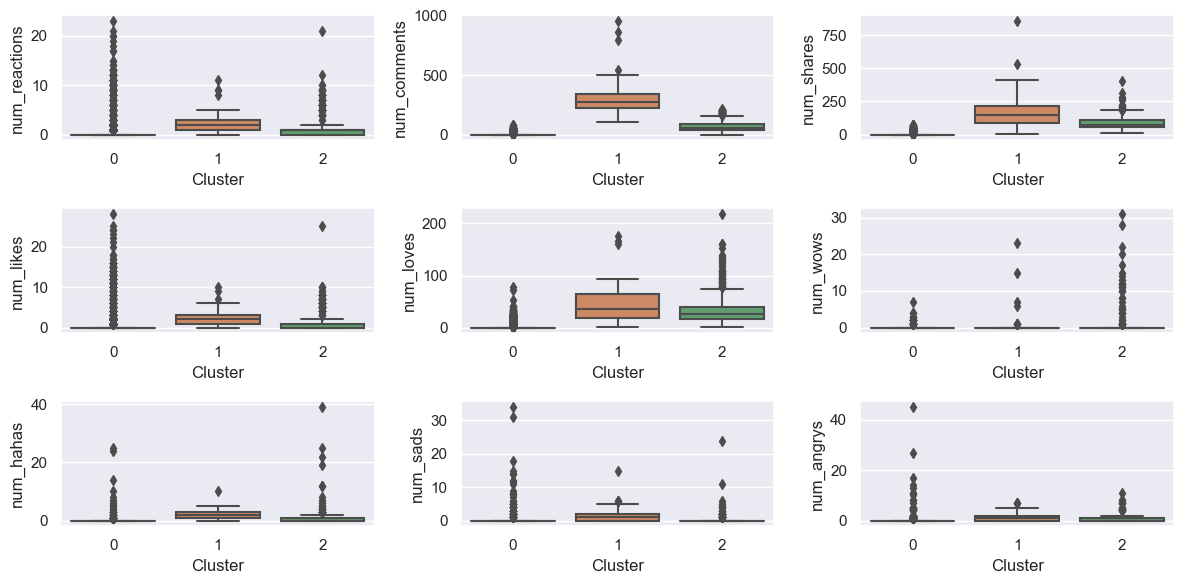

In [45]:
# Calculate the centroid (mean) values for each feature within each cluster
cluster_centroids = df.groupby('Cluster').mean()


# Visualize the clusters in a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='num_reactions', y='num_comments', hue='Cluster', palette='Set1', s=50)
plt.scatter(cluster_centroids['num_reactions'], cluster_centroids['num_comments'], marker='X', s=200, color='black', label='Cluster Centroids')
plt.legend()
plt.xlabel('Number of Reactions')
plt.ylabel('Number of Comments')
plt.title('Clusters Visualization')
plt.show()

# Compare the mean values of each feature across clusters
print(cluster_centroids)

# Perform visualizations to compare feature distributions across clusters
plt.figure(figsize=(12, 6))
features = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, x='Cluster', y=feature)
    plt.xlabel('Cluster')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


The provided data represents the mean (average) values of various features for each cluster. Let's analyze the characteristics of each cluster based on these mean values:

**Cluster 0:**
- **num_reactions**: This cluster has a relatively low average number of reactions.
- **num_comments**: The average number of comments is moderate.
- **num_shares**: The average number of shares is moderate.
- **num_likes**: The average number of likes is moderate.
- **num_loves**: The average number of loves is relatively low.
- **num_wows**: The average number of wows is very low.
- **num_hahas**: The average number of hahas is low.
- **num_sads**: The average number of sads is also low.
- **num_angrys**: The average number of angry reactions is low.
- **encoded_status_type**: The encoded status type is moderate, leaning towards photo and link statuses.
- **status_type_link**: Link statuses are moderately common.
- **status_type_photo**: Photo statuses are common.
- **status_type_status**: Status-type posts are relatively uncommon.
- **status_type_video**: Video statuses are moderately common.

**Cluster 1:**
- **num_reactions**: This cluster has a significantly higher average number of reactions compared to Cluster 0 and Cluster 2.
- **num_comments**: The average number of comments is exceptionally high.
- **num_shares**: The average number of shares is also very high.
- **num_likes**: The average number of likes is relatively high.
- **num_loves**: The average number of loves is notably high.
- **num_wows**: The average number of wows is moderate.
- **num_hahas**: The average number of hahas is relatively high.
- **num_sads**: The average number of sads is also relatively high.
- **num_angrys**: The average number of angry reactions is relatively high.
- **encoded_status_type**: The encoded status type is high, indicating a mix of status types.
- **status_type_link**: Link statuses are almost non-existent.
- **status_type_photo**: Photo statuses are present but not dominant.
- **status_type_status**: Status-type posts are rare.
- **status_type_video**: Video statuses are highly common.

**Cluster 2:**
- **num_reactions**: This cluster has a moderate average number of reactions.
- **num_comments**: The average number of comments is moderate.
- **num_shares**: The average number of shares is also moderate.
- **num_likes**: The average number of likes is moderate.
- **num_loves**: The average number of loves is notably high, similar to Cluster 1.
- **num_wows**: The average number of wows is moderately high.
- **num_hahas**: The average number of hahas is relatively high.
- **num_sads**: The average number of sads is low.
- **num_angrys**: The average number of angry reactions is relatively high.
- **encoded_status_type**: The encoded status type is high, similar to Cluster 1.
- **status_type_link**: Link statuses are rare.
- **status_type_photo**: Photo statuses are present but not dominant.
- **status_type_status**: Status-type posts are rare.
- **status_type_video**: Video statuses are highly common.

These analyses provide an overview of the characteristics of each cluster based on the mean values of the features. Cluster 0 appears to represent posts with lower overall engagement, while Cluster 1 represents highly engaging posts with a focus on comments and shares. Cluster 2 represents moderately engaging posts with a higher emphasis on loves and wows.

Keep in mind that these interpretations are based solely on the mean values and may not capture the full complexity of your data. Further analysis and domain knowledge may be required to gain deeper insights.

### Exercise 2
Sort the different records using the hierarchical clustering algorithm.

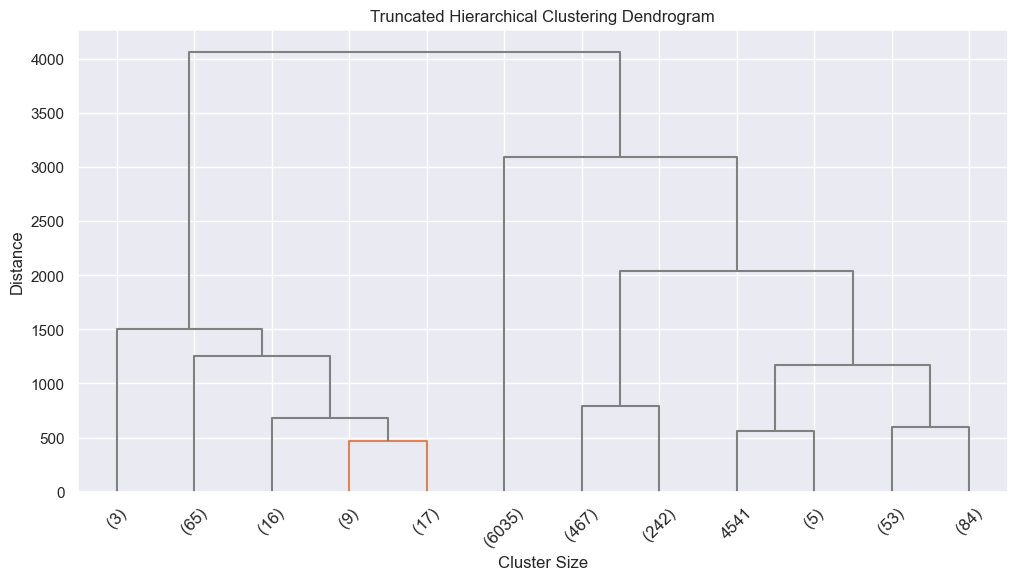

In [46]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage matrix using the 'ward' method
Z = linkage(df_pca, method='ward')

# Create the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, color_threshold=500, above_threshold_color='gray', leaf_rotation=45., leaf_font_size=12., truncate_mode='lastp', p=12)

# Add titles and labels
plt.title('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

# Show the plot
plt.show()


**Cluster Heights and Mergers:**
Cluster mergers are shown as branch unions in the dendrogram. The height of each merger indicates the distance or dissimilarity between the merged clusters. Mergers that occur at a higher altitude indicate greater dissimilarity between the clusters. In other words, the taller the branch, the more different the clusters are from each other.

**Horizontal Distance:**
The horizontal distances between cluster mergers indicate the distance or dissimilarity between them. The greater the horizontal distance, the greater the dissimilarity between the merged clusters. These horizontal distances are useful in understanding the relationships between clusters and their dissimilarity levels.

**Horizontal Lines:**
On the dendrogram, horizontal lines can be added to help determine the proper number of clusters. These lines may represent distance or dissimilarity thresholds. In this case, two horizontal lines have been drawn at distance values 500 and 150. These lines can serve as cutoff points to identify the number of clusters. The points where the dendrogram intersects these lines represent potential cluster solutions.

**Collapsed Branches:**
The `truncate_mode` parameter is set to 'lastp' to collapse the branches of the dendrogram when a certain number of clusters is reached. In this case, it's set to 12, which means that the branches that result in 12 clusters are collapsed for easier viewing. This truncation allows us to focus on a specific range of clusters and understand their relationships.

---

Using the dendrogram, you can visually inspect the height of mergers, the horizontal distances, and the number of clusters formed at different cutoff points. This analysis will help you make informed decisions about the appropriate number of clusters for your data.

## Exercise 3
Calculate the clustering performance using a parameter such as silhouette.

In [54]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

# Clustering using PCA components
kmeans_model_pca = KMeans(n_clusters=num_clusters, random_state=42)
clusters_pca = kmeans_model_pca.fit_predict(df_pca[['PCA_1', 'PCA_2']])
silhouette_avg_pca = silhouette_score(df_pca[['PCA_1', 'PCA_2']], clusters_pca)
print("Silhouette Score (PCA):", silhouette_avg_pca)

# Clustering using original features
kmeans_model_original = KMeans(n_clusters=num_clusters, random_state=42)
clusters_original = kmeans_model_original.fit_predict(df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']])
silhouette_avg_original = silhouette_score(df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']], clusters_original)
print("Silhouette Score (Original):", silhouette_avg_original)

# Hierarchical Clustering
Z = linkage(df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']], method='ward')
threshold = 500  # Adjust this threshold as needed
cluster_labels = fcluster(Z, threshold, criterion='distance')
silhouette_avg_hierarchical = silhouette_score(df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']], cluster_labels)
print("Silhouette Score (Hierarchical):", silhouette_avg_hierarchical)


Silhouette Score (PCA): 0.8797773447717384
Silhouette Score (Original): 0.8594081357098685
Silhouette Score (Hierarchical): 0.7968691152406108


The Silhouette Score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

Here's an analysis of the Silhouette Scores you provided:

1. **Silhouette Score (PCA): 0.8798**
   - This score suggests that the K-Means clustering using PCA features (PCA_1 and PCA_2) resulted in well-defined and compact clusters. The average distance between data points within the same cluster is relatively small compared to the average distance between data points in different clusters. An average Silhouette Score of around 0.88 is quite high, indicating good separation between clusters.

2. **Silhouette Score (Original): 0.8594**
   - This score represents the Silhouette Score when using the original features without PCA. It's also quite high, indicating that the original features alone can form well-defined clusters. While it's slightly lower than the PCA-based clustering, it's still a very good result.

3. **Silhouette Score (Hierarchical): 0.7969**
   - This score represents the Silhouette Score when using hierarchical clustering. The score is lower than the K-Means results, suggesting that hierarchical clustering might not have formed clusters as well-separated as K-Means did. However, it's important to note that the absolute value of 0.7969 is still relatively high, indicating reasonable cluster separation.

In summary, based on Silhouette Scores:
- PCA-based clustering resulted in the highest cluster separation, indicating that the PCA features helped in creating distinct clusters.
- Original feature-based clustering also performed very well.
- Hierarchical clustering, while having a slightly lower score, still produced reasonably well-separated clusters.

The choice between PCA-based, original feature-based, or hierarchical clustering should consider the specific goals of your analysis and the interpretability of the clusters. Higher Silhouette Scores generally indicate better-defined clusters, but the choice should also consider the context and requirements of your project.